## Importing the packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Objectve: To perform an Exploratory analysis on Haberman Dataset, Studying the features and represent the findings

Reading the data 

In [6]:
haberman_data=pd.read_csv(r"C:\Users\Ankesh\Kaggle Dataset\haberman.csv")
haberman_data.head(4)
#objective is to find out if we have the age and the lymph nodes,
# what is the possibilty of the patient to have to status of 1 or 2

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1


## Task: Describe the correlation of features age,year and affected lymph nodes deiciding the status of patient survival

In [41]:
haberman_data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

### Features given: 
#### Age: Age of the patient during operation
#### Year: Year of the operation
#### Nodes: Number of affected lymph nodes when patient got admission
#### Survival Status: It represents whether patient survive more than 5 years or less after surgery.
Here if patients survived 5 years or more is represented as 1
patients who survived less than 5 years is represented as 2.

#### Shape of Data

In [42]:
haberman_data.shape 

(306, 4)

#### Describing the whole dataset and observing the min, max, avg of all the feature

In [44]:
haberman_data.describe(include='all')

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### Checking for columns with null values 

In [47]:
haberman_data.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

#### Start and End date of the surgery and its count: 

1958 was the year in which we had most no of surgeries/patient encountered,
1969 was the year in which we had least no of surgeries/patient encountered

In [11]:
haberman_data.year.min()
#year in which survey started

58

In [12]:
haberman_data.year.max()
#year in which survey ended

69

In [18]:
haberman_data.year.value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

#### Understanding Lymph Nodes: 

The lymph nodes try to catch and trap cancer cells before they reach other parts of the body.
A lymph node in the area of the armpit (axilla) to which cancer has spread.
This spread is determined by surgically removing some of the lymph nodes 
and examining them under a microscope to see whether cancer cells are present

In [48]:
print ("lymph node minimum: {}".format(haberman_data.nodes.min()))
print ("lymph node maximum: {}".format(haberman_data.nodes.max()))


lymph node minimum: 0
lymph node maximum: 52


#### Survival Status of Patients: 


out of 306 patients, 225 patients survived for more than 5 years
out of 306 patients, 81 patients survided for less than 5 years

In [49]:
haberman_data['status'].value_counts()


1    225
2     81
Name: status, dtype: int64

## Visualization of data

### """1D scatter plot"""


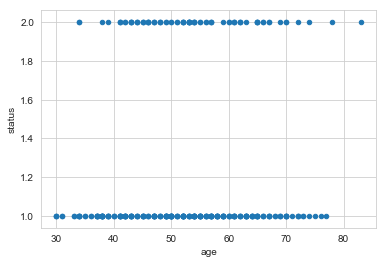

In [50]:

haberman_data.plot(x='age',y='status',kind='scatter')


### My analysis: 
Patient of age group (30-40) and (72-77) have survived has status as 1:
meaning they have survived for more than 5 years

### Plotting Faceplot 

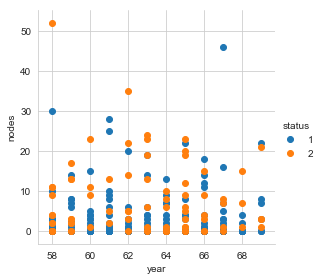

In [52]:
sns.FacetGrid(data=haberman_data,hue='status',height=4).map(plt.scatter,'year','nodes').add_legend()


### My Analysis: 
lymph nodes detected for most of the patients applicable to all age  group were less than 20 during surgery. 

### Plotting to check desnity between patient with status 1 over 2

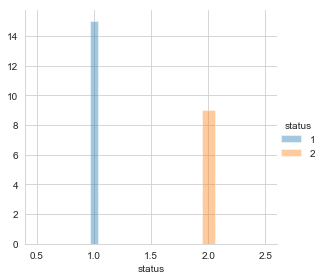

In [57]:
sns.FacetGrid(data=haberman_data,hue='status',height=4).map(sns.distplot,'status').add_legend()


#### My Analysis: 
In the survey,more patients have survived for more than 5 years, Surgery has been efficiecnt here

### PLotting the pair plot for more clear visualisation across multiple features

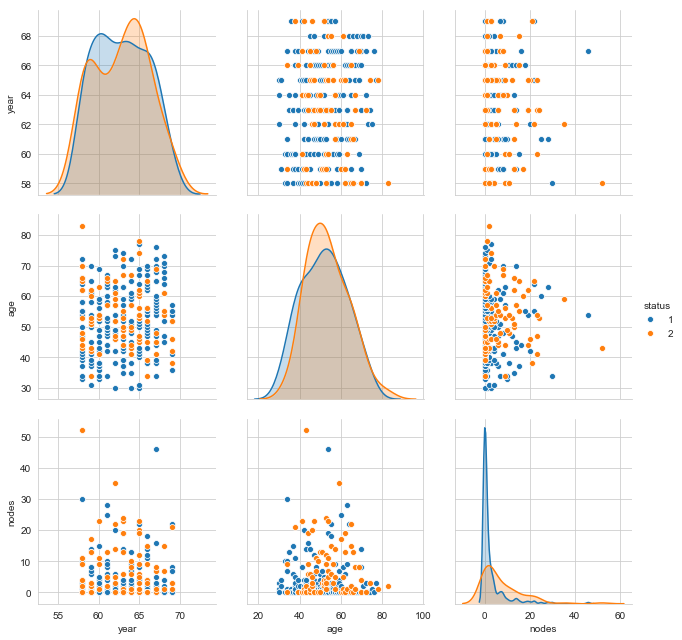

In [60]:
sns.pairplot(data=haberman_data,hue='status', vars=['year','age','nodes'],height=3)
sns.set_style('whitegrid')

#### Insights from pair plot: 
Patient having status 2 (survied less than 5 years) were older than patient with status 1

#### Diving data Status wise

In [22]:
haberman_data_longsurvive=haberman_data.loc[haberman_data['status']==1]
haberman_data_shortsurvive=haberman_data.loc[haberman_data['status']==2]

#### """PDF and CDF of nodes as per patient status 1"""


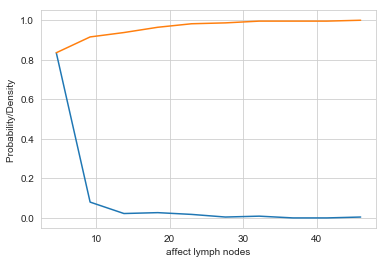

In [63]:

counts,edges=np.histogram(haberman_data_longsurvive['nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.xlabel('affect lymph nodes')
plt.ylabel('Probability/Density ')
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.show()


#### """PDF and CDF of nodes as per patient status 2 """


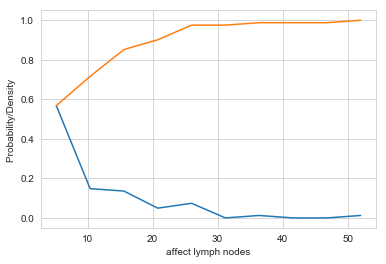

In [64]:
counts,edges=np.histogram(haberman_data_shortsurvive['nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.xlabel('affect lymph nodes')
plt.ylabel('Probability/Density ')
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)

### """Analysis with the PDF and CDF based on affected lymph nodes
Status 1
if the affected lymph nodes is less than 10, probability is 80% patient will be status 1
if the affected lymph nodes more than 35, probability is 95% patient will be stage 1

Status 2
if the affected lymph nodes is less than 10, probability is 65% patient will be status 2
if the affected lymph nodes is more than 35 probability is 95% patient will be status 2


"""

### PDF and CDF of age with respect to patient's survival status

#### """PDF and CDF with age for status 1 patient"""

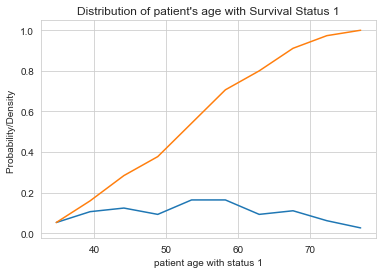

In [71]:
counts,edges=np.histogram(haberman_data_longsurvive['age'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.xlabel('patient age with status 1')
plt.ylabel('Probability/Density ')
plt.title("Distribution of patient's age with Survival Status 1")

plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)

#### """PDF and CDF of age as per patient status 2"""


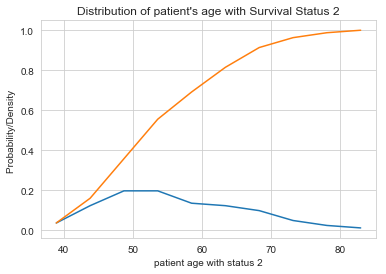

In [70]:
counts,edges=np.histogram(haberman_data_shortsurvive['age'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.xlabel('patient age with status 2')
plt.ylabel('Probability/Density ')
plt.title("Distribution of patient's age with Survival Status 2")
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)

### Analysis based on PDF, CDF of age

Most number of patients with staus 1 are from age 55-60 with survival rate of 44%
Least number of patients with status 1 are from age group 75-80 with survival rate of 100%

Success rate of surgery of 100% has been observed as patient with age > 70 years
Success rate of surgery of 7.5% has been observed as patient with age <45 years 
-------------------
Most number of patients with status 2 are from age 48-55 with survival rate of 40%
Least number of patients with status 2 are from age 75-85 with survival rate of 100%

Success rate of surgery with 100% has been observed as pateint with age > 75 years
Success rate of surgery of with 7.5% has been observed for patient with age <45 years


###  Drawing more insights through median, quartile through box plot


52.0
43.0
46.0


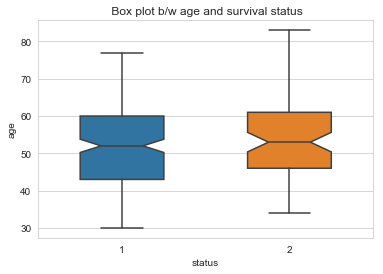

In [72]:
sns.boxplot(data=haberman_data,x='status',y='age',width=0.5,notch=True).set_title(" Box plot b/w age and survival status")
#median age for stage 1 people is- 52
print (np.median(haberman_data_longsurvive['age']))
print (np.percentile(haberman_data_longsurvive['age'],25))
print (np.percentile(haberman_data_shortsurvive['age'],25))



### Insights from Box Plot: 
Median age for stage 1 people is: 52
Percentile of stage 1 patients are less than 43 years
Percentile of stage 2 patients are less than 46years



#### Plotting Violin plot

Text(0.5, 1.0, 'Violin plot b/w age and survival status')

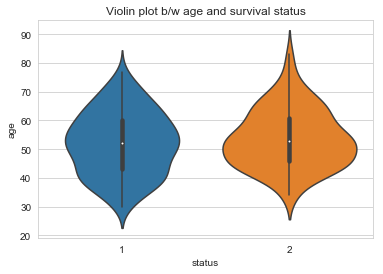

In [74]:
sns.violinplot(data=haberman_data,x='status',y='age').set_title("Violin plot b/w age and survival status")

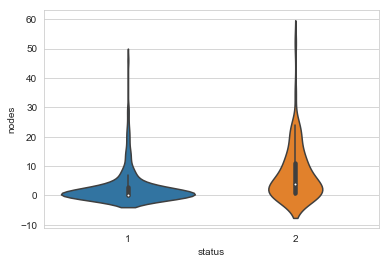

In [34]:
sns.violinplot(data=haberman_data,x='status',y='nodes')


#### Insights from Violin plot: 
stage 1 patients has lesser affected lymph (less than 10)

### Plotting Join plot to see the distribution across age of Patient and Affected Nodes

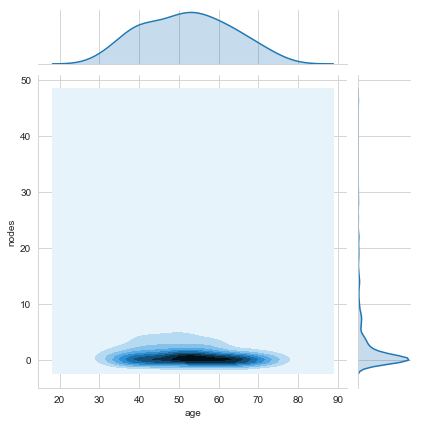

In [79]:
sns.jointplot(data=haberman_data_longsurvive,x='age',y='nodes',kind='kde')

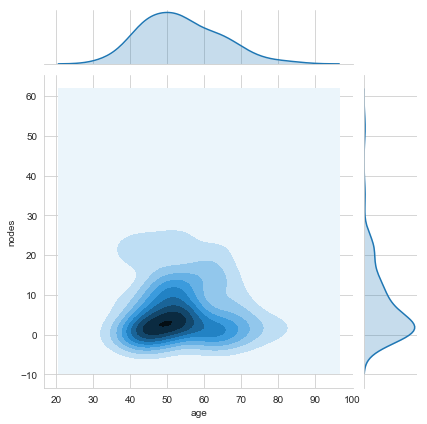

In [36]:
sns.jointplot(data=haberman_data_shortsurvive,x='age',y='nodes',kind='kde')


#### Insights from JOINT plot: 
for stage 1 patients, denisty can be seen higher for age between (40-60)years
for stage 2 patients, denisty can be seen higher for age between (45years-65years)

## Analysis with all observations :
#### In our dataset, We have 4 columns. 
###### Age- Age of the patient. 
###### Year-In which year patient went through the surgery. 
###### Lymph Nodes- How many affected lypmh nodes does the person had before the surgery
###### Survival Status: 
It represent whether patient survive more than 5 years or less after undergone through surgery.
Here if patients survived 5 years or more is represented as 1
patients who survived less than 5 years is represented as 2.

#### Period of Survey
The survey started in 1958 and completed in 1969 with experimenting total of 306 patients. 
The survey had below key points: 
out of 306 patients, 225 patients survived for more than 5 years
out of 306 patients, 81 patients survided for less than 5 years

patient with age 54 has maximum cancer patient encountered
patient with age 83(eldest) has minimun patient encountered

1958 was the year in which we had most no of surgeries/patient encountered-36 surgery
1969 was the year in which we had least no of surgeries/patient encountered-11 surgery

Patient of age group (30-40) and (72-77) have survival status as 1:
meaning they have survived for more than 5 years

Patient with status 1 had lesser no. of affected lymph nodes

### Conclusion: 

#### Status 1
if the affected lymph nodes is less than 10, probability is 80% patient will be status 1
if the affected lymph nodes more than 35, probability is 95% patient will be stage 1

#### Status 2
if the affected lymph nodes is less than 10, probability is 65% patient will be status 2
if the affected lymph nodes is more than 35 probability is 95% patient will be status 2
Most number of patients with staus 1 are from age 55-60 with survival rate of 44%
Least number of patients with status 1 are from age group 75-80 with survival rate of 100%
Status 1:
Success rate of surgery of 100% has been observed as patient with age > 70 years
Success rate of surgery of 7.5% has been observed as patient with age <45 years 
-------------------
Most number of patients with status 2 are from age 48-55 with survival rate of 40%
Least number of patients with status 2 are from age 75-85 with survival rate of 100%
Status 2:
Success rate of surgery with 100% has been observed as pateint with age > 75 years
Success rate of surgery with 7.5% has been observed for patient with age <45 years
---


In [80]:
### Function developed to guess the survival status of a new patient 

In [81]:
def status(age,nodes):
    if ((70<=age<=85) and ((35<=nodes<=50) or (nodes<11))):
        return True
    elif ((45<=age<=69) and (35<=nodes<=50)):
        return False
age=int(input('Enter the patient\'s age :  '))
nodes=int(input('Enter the count of lymph nodes :  '))
result=status(age,nodes)
if result:
    print ('surgery status is 1')
else:
    print ('surgery status is 2')

Enter the patient's age :  34
Enter the count of lymph nodes :  10
surgery status is 2
